In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

In [2]:
def fun1(x):
    return np.exp(-5 * np.cos(x)) - 5 * np.cos(x) + 1

def eq1(t, x):
    return 25 * np.sin(t) * np.cos(t) + 5 * x * np.sin(t)

In [3]:
def print_plots(n, euler, runkut, x0, xk, name):
    t = np.linspace(x0, xk, n)
    x = np.linspace(x0, xk, n)
    s = fun1(t)
    print('Błąd rozwiązania Euler (średniokwaratowy): {0:f}'.format(np.linalg.norm(euler - s) / n))
    print('Błąd rozwiązania Euler (norma maksimum): {0:f}'.format(np.linalg.norm(euler - s, ord=np.inf)))
    print('Błąd rozwiązania Runge-Kutta (średniokwaratowy): {0:f}'.format(np.linalg.norm(runkut - s) / n))
    print('Błąd rozwiązania Runge-Kutta (norma maksimum): {0:f}'.format(np.linalg.norm(runkut - s, ord=np.inf)))
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(t, s, label="Dokładne rozw.")
    ax.plot(x, euler, label="Euler")
    ax.plot(x, runkut, label="Runge-Kutta")
    ax.set_title(name)
    ax.set_ylabel('f(x)')
    ax.set_xlabel('x')
    ax.legend()
    plt.show()

In [4]:
def euler(f, n, a, b, xa):
    result = np.empty((n + 1,))
    h = (b - a) / n
    x = xa
    t = a
    for i in range(n):
        result[i] = x
        x = x + h * f(t, x)
        t = t + h
    result[n] = x
    return result

In [5]:
def runge_kutta(f, n, a, b, xa):
    result = np.empty((n + 1,))
    h = (b - a) / n
    x = xa
    t = a
    for i in range(n):
        result[i] = x
        k1 = h * f(t, x)
        k2 = h * f(t + h / 2, x + k1 / 2)
        k3 = h * f(t + h / 2, x + k2 / 2)
        k4 = h * f(t + h, x + k3)
        x = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = a + (i + 1) * h
    result[n] = x
    return result

Błąd rozwiązania Euler (średniokwaratowy): 4797.962452
Błąd rozwiązania Euler (norma maksimum): 40335.070015
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 528888.670413
Błąd rozwiązania Runge-Kutta (norma maksimum): 5026019.569584


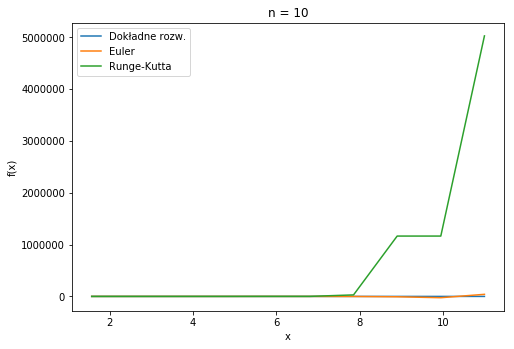

Błąd rozwiązania Euler (średniokwaratowy): 30.927787
Błąd rozwiązania Euler (norma maksimum): 438.687161
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 404.527022
Błąd rozwiązania Runge-Kutta (norma maksimum): 6235.140052


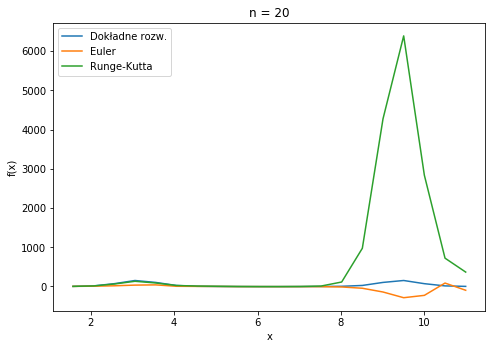

Błąd rozwiązania Euler (średniokwaratowy): 38.208441
Błąd rozwiązania Euler (norma maksimum): 685.283389
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 8.494488
Błąd rozwiązania Runge-Kutta (norma maksimum): 160.617716


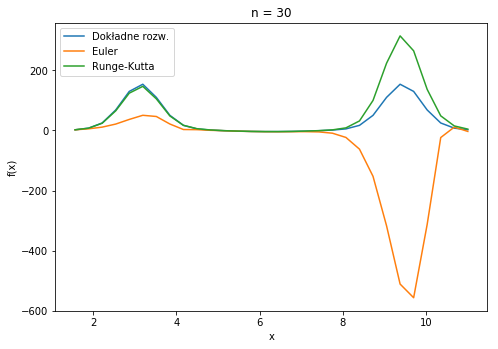

Błąd rozwiązania Euler (średniokwaratowy): 41.252599
Błąd rozwiązania Euler (norma maksimum): 897.827548
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 1.164368
Błąd rozwiązania Runge-Kutta (norma maksimum): 24.449022


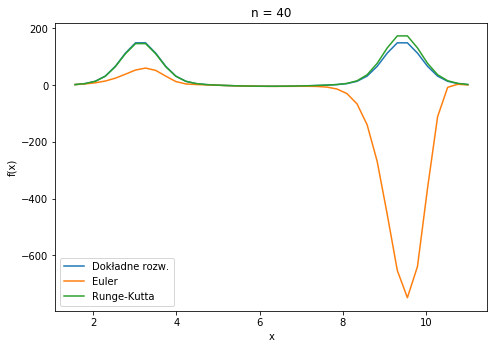

Błąd rozwiązania Euler (średniokwaratowy): 42.808669
Błąd rozwiązania Euler (norma maksimum): 1036.376791
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 0.288742
Błąd rozwiązania Runge-Kutta (norma maksimum): 6.900296


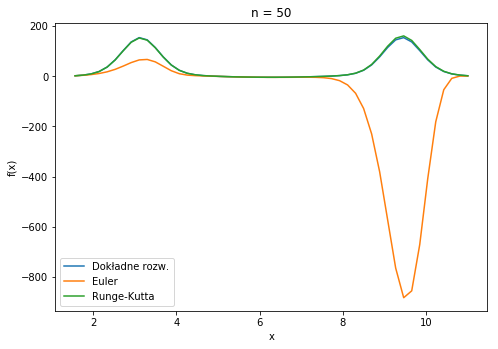

Błąd rozwiązania Euler (średniokwaratowy): 10.956306
Błąd rozwiązania Euler (norma maksimum): 839.812019
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 0.000004
Błąd rozwiązania Runge-Kutta (norma maksimum): 0.000242


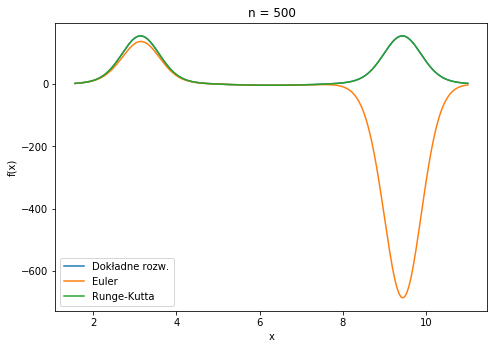

Błąd rozwiązania Euler (średniokwaratowy): 0.477001
Błąd rozwiązania Euler (norma maksimum): 115.533445
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 0.000000
Błąd rozwiązania Runge-Kutta (norma maksimum): 0.000000


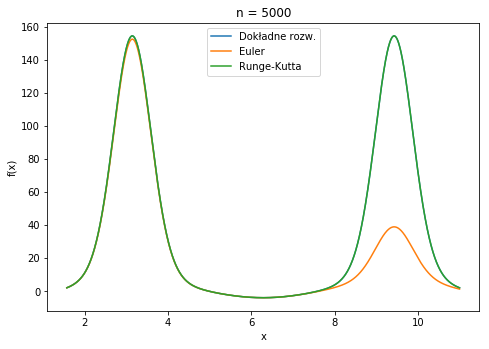

Błąd rozwiązania Euler (średniokwaratowy): 0.015602
Błąd rozwiązania Euler (norma maksimum): 11.948987
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 0.000000
Błąd rozwiązania Runge-Kutta (norma maksimum): 0.000000


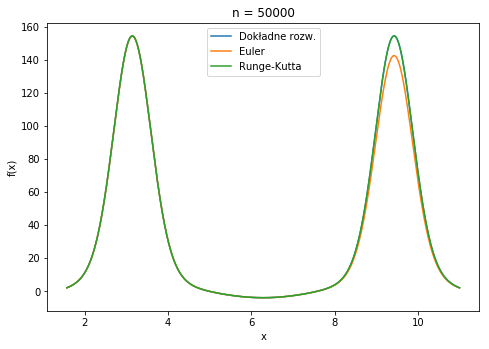

Błąd rozwiązania Euler (średniokwaratowy): 0.000495
Błąd rozwiązania Euler (norma maksimum): 1.198951
Błąd rozwiązania Runge-Kutta (średniokwaratowy): 0.000000
Błąd rozwiązania Runge-Kutta (norma maksimum): 0.000000


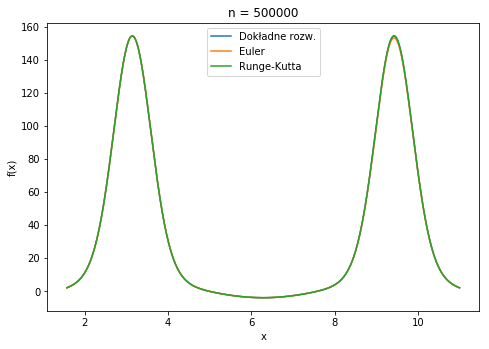

In [12]:
x0 = np.pi / 2
xk = 7 * np.pi / 2
for n in range(10, 50, 10):
    r = runge_kutta(eq1, n - 1, x0, xk, 2)
    e = euler(eq1, n - 1, x0, xk, 2)
    print_plots(n, e, r, x0, xk, 'n = {0:d}'.format(n))
n = 50
for i in range(5):
    r = runge_kutta(eq1, n - 1, x0, xk, 2)
    e = euler(eq1, n - 1, x0, xk, 2)
    print_plots(n, e, r, x0, xk, 'n = {0:d}'.format(n))
    n = n * 10

In [20]:
def fun2(x):
    return np.cos(x) - x * np.sin(x)

def u_fun(t):
    return -2 * np.cos(t)

def v_fun(t):
    return -1

def w_fun(t):
    return 0

In [21]:
def print_plots_2(n, y, x0, xk, name):
    t = np.linspace(x0, xk, 1000)
    x = np.linspace(x0, xk, n)
    s = fun2(t)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(t, s, label="Dokładne rozw.")
    ax.plot(x, y, label="MRS")
    ax.set_title(name)
    ax.set_ylabel('f(x)')
    ax.set_xlabel('x')
    ax.legend()
    plt.show()

In [22]:
def bvp(u, v, w, n, ta, tb, xa, xb):
    h = (tb - ta) / n
    a = np.empty(n + 1)
    b = np.empty(n + 1)
    c = np.empty(n + 1)
    d = np.empty(n + 1)
    for i in range(1, n):
        t = ta + i * h
        a[i] = -(1 + h / 2 * w(t))
        d[i] = 2 + h**2 * v(t)
        c[i] = -(1 - h / 2 * w(t))
        b[i] = -h**2 * u(t)
    b[1] = b[1] - a[1] * xa
    b[n - 1] = b[n - 1] - c[n - 1] * xb
    banded = np.array([c[0:n-1], d[1:n], a[2:n+1]], dtype=np.float64)
    y = solve_banded((1,1), banded, b[1:n])
    return np.concatenate(([xa], y, [xb]))

In [23]:
fun2(2 * np.pi + 2)

-7.948025922285835

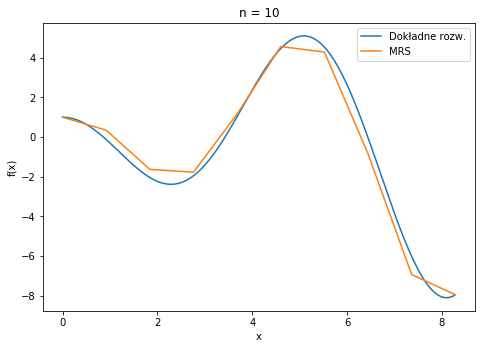

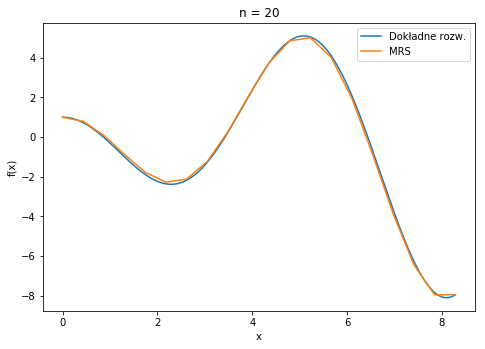

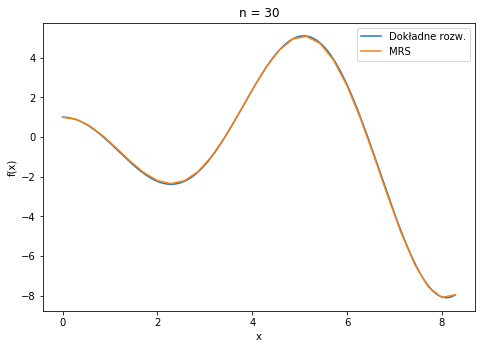

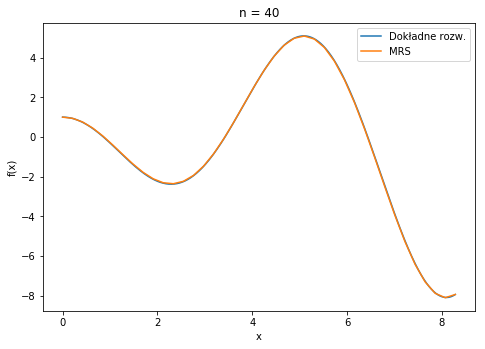

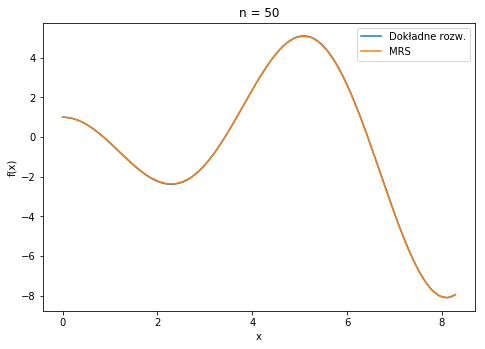

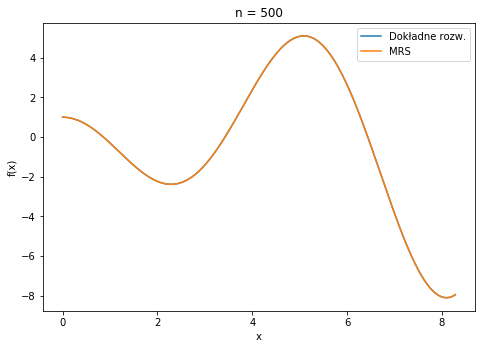

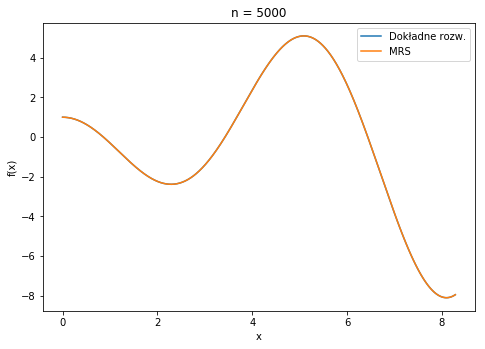

ValueError: array must not contain infs or NaNs

In [24]:
x0 = 0
xk = 2 * np.pi + 2
a = 1
b = fun2(xk)
for n in range(10, 50, 10):
    y = bvp(u_fun, v_fun, w_fun, n-1, x0, xk, a, b)
    print_plots_2(n, y, x0, xk, 'n = {0:d}'.format(n))
n = 50
for i in range(5):
    y = bvp(u_fun, v_fun, w_fun, n-1, x0, xk, a, b)
    print_plots_2(n, y, x0, xk, 'n = {0:d}'.format(n))
    n = n * 10

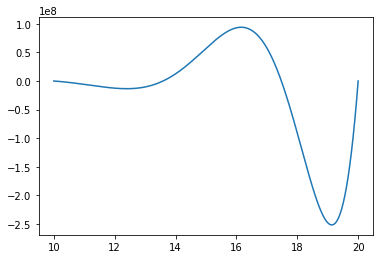

In [13]:
ux = lambda x: np.exp(x) - 3 * np.sin(x)
vx = lambda x: -1
wx = lambda x: 1
n = 999
ta = 10
tb = 20
xa = 1.09737491
xb = 8.63749661
x = np.linspace(10, 20, 1000)
y = bvp(ux, vx, wx, n, ta, tb, xa, xb)
plt.plot(x, y)

array([1.        , 1.02      , 1.0404    , 1.061208  , 1.08243216,
       1.1040808 , 1.12616242, 1.14868567, 1.17165938, 1.19509257,
       1.21899442, 1.24337431, 1.26824179, 1.29360663, 1.31947876,
       1.34586834, 1.37278571, 1.40024142, 1.42824625, 1.45681117,
       1.4859474 , 1.51566634, 1.54597967, 1.57689926, 1.60843725,
       1.64060599, 1.67341811, 1.70688648, 1.74102421, 1.77584469,
       1.81136158, 1.84758882, 1.88454059, 1.9222314 , 1.96067603,
       1.99988955, 2.03988734, 2.08068509, 2.12229879, 2.16474477,
       2.20803966, 2.25220046, 2.29724447, 2.34318936, 2.39005314,
       2.43785421, 2.48661129, 2.53634352, 2.58707039, 2.63881179,
       2.69158803, 2.74541979, 2.80032819, 2.85633475, 2.91346144,
       2.97173067, 3.03116529, 3.09178859, 3.15362436, 3.21669685,
       3.28103079, 3.3466514 , 3.41358443, 3.48185612, 3.55149324,
       3.62252311, 3.69497357, 3.76887304, 3.8442505 , 3.92113551,
       3.99955822, 4.07954939, 4.16114038, 4.24436318, 4.32925

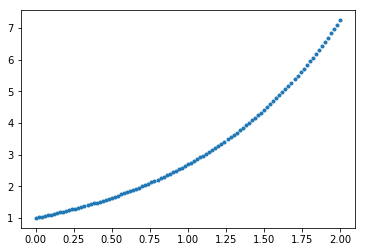

In [15]:
x = np.linspace(0, 2, 101)
y = euler(lambda t, x: x, 100, 0, 2, 1)
plt.plot(x, y, '.')
y

array([1.        , 1.02020134, 1.04081077, 1.06183655, 1.08328707,
       1.10517092, 1.12749685, 1.1502738 , 1.17351087, 1.19721736,
       1.22140276, 1.24607673, 1.27124915, 1.29693009, 1.32312981,
       1.34985881, 1.37712776, 1.40494759, 1.43332941, 1.46228459,
       1.4918247 , 1.52196155, 1.55270722, 1.58407398, 1.6160744 ,
       1.64872127, 1.68202765, 1.71600686, 1.7506725 , 1.78603843,
       1.8221188 , 1.85892804, 1.89648088, 1.93479233, 1.97387773,
       2.01375271, 2.05443321, 2.09593551, 2.13827622, 2.18147226,
       2.22554093, 2.27049984, 2.31636697, 2.36316069, 2.4108997 ,
       2.45960311, 2.50929039, 2.55998142, 2.61169647, 2.66445624,
       2.71828182, 2.77319476, 2.82921701, 2.88637099, 2.94467955,
       3.00416602, 3.0648542 , 3.12676836, 3.18993327, 3.2543742 ,
       3.32011692, 3.38718773, 3.45561346, 3.52542148, 3.59663972,
       3.66929666, 3.74342137, 3.8190435 , 3.89619329, 3.97490162,
       4.05519996, 4.13712043, 4.22069581, 4.30595952, 4.39294

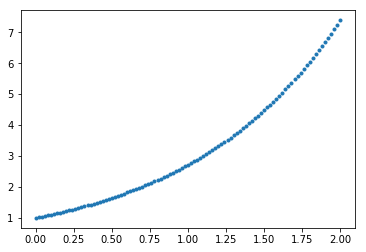

In [16]:
x = np.linspace(0, 2, 101)
y = runge_kutta(lambda t, x: x, 100, 0, 2, 1)
plt.plot(x, y, '.')
y

array([2.        , 2.01562516, 2.03125127, 2.04687929, 2.06251018,
       2.07814488, 2.09378436, 2.10942958, 2.12508151, 2.1407411 ,
       2.15640933, 2.17208718, 2.18777563, 2.20347565, 2.21918824,
       2.23491441, 2.25065514, 2.26641145, 2.28218436, 2.2979749 ,
       2.31378411, 2.32961302, 2.34546269, 2.3613342 , 2.37722861,
       2.39314702, 2.40909052, 2.42506023, 2.44105728, 2.45708281,
       2.47313798, 2.48922395, 2.50534192, 2.5214931 , 2.5376787 ,
       2.55389997, 2.57015817, 2.58645459, 2.60279052, 2.61916729,
       2.63558624, 2.65204876, 2.66855623, 2.68511007, 2.70171174,
       2.7183627 , 2.73506447, 2.75181857, 2.76862658, 2.78549008,
       2.80241071, 2.81939013, 2.83643005, 2.8535322 , 2.87069836,
       2.88793035, 2.90523003, 2.92259929, 2.9400401 , 2.95755444,
       2.97514436, 2.99281195, 3.01055936, 3.02838878, 3.04630249,
       3.06430279, 3.08239207, 3.10057276, 3.11884737, 3.13721848,
       3.15568874, 3.17426087, 3.19293767])

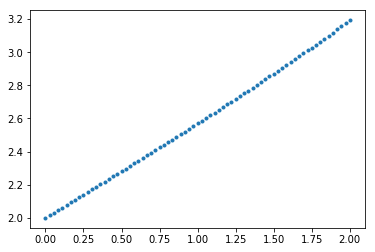

In [17]:
x = np.linspace(0, 2, 73)
y = runge_kutta(lambda t, x: 2 + (x - t - 1)**2, 72, 1, 1.5625, 2)
plt.plot(x, y, '.')
y

In [18]:
from scipy.linalg import solve_banded
a = [100,  0, -1, -1, -1]
b = [0,  2,  2,  2,  2]
c = [5,  4,  3,  2,  1]
d = [1,  1,  1,  1,  0]
ab = np.array([a,b,c,d])
b = np.array([0, 1, 2, 2, 3])
x = solve_banded((1, 2), ab, b)
ab

array([[100,   0,  -1,  -1,  -1],
       [  0,   2,   2,   2,   2],
       [  5,   4,   3,   2,   1],
       [  1,   1,   1,   1,   0]])

In [19]:
a = np.array([2,3,4])
b = np.array([1])
np.concatenate((b, a, [2]))

array([1, 2, 3, 4, 2])